In [44]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
from sklearn.datasets import load_boston
import sklearn
from sklearn.linear_model import LinearRegression 

In [3]:
# Load the housing dataset
boston = load_boston()

In [4]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

boston_df['Price'] = boston.target
#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


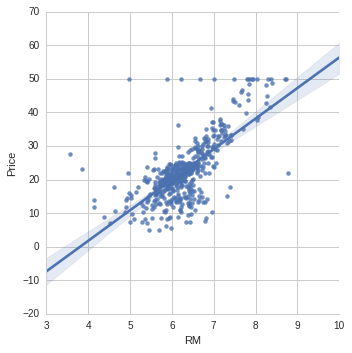

In [12]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)

# use np.linalg.lstsq()

>* one should read the description at [here](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html)
>* the function solves multivariable linear equations formulated like this : Ax = B
>* the first element of the output .[0] is the vector/matrix of x

In [49]:
# Set up X as median room values
A = boston_df.RM

# Use v to make X two-dimensional
A = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
B = boston_df.Price

In [14]:
# Create the X array in the form [X 1]
A = np.array( [ [value,1] for value in A ] )

In [16]:
# Now get out m and b values for our best fit line
xxx = np.linalg.lstsq(A, B)

In [17]:
# [0] is the k and b of the linear function y = kx+b
xxx[0]

array([  9.10210898, -34.67062078])

In [19]:
# [1] is the summed total error
xxx[1]

array([ 22061.87919621])

In [20]:
# [2] is the rank of variable input matrix
xxx[2]

2

In [21]:
# [3] is the singular values of variable input matrix
xxx[3]

array([ 143.99484122,    2.46656609])

## multivariable

In [47]:
A2 = np.column_stack((boston_df.RM, boston_df.CRIM, [1]*len(boston_df)))

In [39]:
linearfit = np.linalg.lstsq(A2,B)[0]
linearfit

array([  8.3975317 ,  -0.2618229 , -29.30168135])

>* it can actually intake a DataFrame as input variable

In [96]:
A3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,constant
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,1
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1


In [97]:
# A3 = boston_df.drop('Price',1).as_matrix()
A3 = boston_df.drop('Price',1)
A3['constant'] = 1
result = np.linalg.lstsq(A3,B)
coeff = result[0]
summed_error = result[1]
print summed_error/len(boston_df)
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['features']
coeff_df['Coefficient Estimate'] = Series(coeffs[:len(coeffs)])
coeff_df

[ 21.89777922]


,features,Coefficient Estimate
0,CRIM,-0.091630
1,ZN,0.048675
2,INDUS,-0.003779
3,CHAS,2.856368
4,NOX,-2.880779
5,RM,5.925214
6,AGE,-0.007224
7,DIS,-0.967995
8,RAD,0.170443
9,TAX,-0.009389


>* the teacher uses another method/function, -- sklearn.linear_model.LinearRegression class -- read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [73]:
lr = LinearRegression()
lr.fit(boston_df.drop('Price',1),boston_df.Price)

coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['features']
coeff_df['Coefficient Estimate'] = Series(lr.coef_)
coeff_df

,features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [84]:
B_hat = lr.predict(boston_df.drop('Price',1))
B_real = np.array(boston_df.Price)
print type(B_hat), np.shape(B_hat), type(B_real), np.shape(B_real)

<type 'numpy.ndarray'> (506,) <type 'numpy.ndarray'> (506,)


In [93]:
mse = np.mean((B_real-B_hat)**2)
mse

21.8977792176875